In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from network import Network
from network import Predictions
from preprocessing import Preprocessing

torch.set_grad_enabled(True)

## Čišćenje dataSet-ova

In [2]:
preprocessing = Preprocessing()

In [3]:
# preprocessing.CheckImages("training/benign/")
# preprocessing.CheckImages("training/malignant/")

# preprocessing.CheckImages("validation/benign/")
# preprocessing.CheckImages("validation/malignant/")

# preprocessing.CheckImages("testing/benign/")
# preprocessing.CheckImages("testing/malignant/")

../dataSet/training/benign/8863_idx5_x1651_y2301_class0.png	 (35, 50, 3)
../dataSet/training/benign/8863_idx5_x1701_y2301_class0.png	 (35, 50, 3)
../dataSet/training/benign/8863_idx5_x1751_y2301_class0.png	 (35, 50, 3)
../dataSet/training/benign/8863_idx5_x2751_y1551_class0.png	 (50, 41, 3)
../dataSet/training/benign/8864_idx5_x1001_y2901_class0.png	 (42, 50, 3)
../dataSet/training/benign/8864_idx5_x101_y2901_class0.png	 (42, 50, 3)
../dataSet/training/benign/8864_idx5_x1051_y2901_class0.png	 (42, 50, 3)
../dataSet/training/benign/8864_idx5_x1101_y2901_class0.png	 (42, 50, 3)
../dataSet/training/benign/8864_idx5_x1151_y2901_class0.png	 (42, 50, 3)
../dataSet/training/benign/8864_idx5_x1201_y2901_class0.png	 (42, 50, 3)
../dataSet/training/benign/8864_idx5_x1251_y2901_class0.png	 (42, 50, 3)
../dataSet/training/benign/8864_idx5_x1301_y2901_class0.png	 (42, 50, 3)
../dataSet/training/benign/8864_idx5_x1351_y2901_class0.png	 (42, 50, 3)
../dataSet/training/benign/8864_idx5_x1401_y2901_cla

../dataSet/training/benign/8914_idx5_x2451_y2901_class0.png	 (42, 50, 3)
../dataSet/training/benign/8914_idx5_x2501_y2901_class0.png	 (42, 50, 3)
../dataSet/training/benign/8914_idx5_x251_y2901_class0.png	 (42, 50, 3)
../dataSet/training/benign/8914_idx5_x2551_y2901_class0.png	 (42, 50, 3)
../dataSet/training/benign/8914_idx5_x2601_y2901_class0.png	 (42, 50, 3)
../dataSet/training/benign/8914_idx5_x2651_y2901_class0.png	 (42, 50, 3)
../dataSet/training/benign/8914_idx5_x2701_y2901_class0.png	 (42, 50, 3)
../dataSet/training/benign/8914_idx5_x2751_y2901_class0.png	 (42, 50, 3)
../dataSet/training/benign/8914_idx5_x2801_y2901_class0.png	 (42, 50, 3)
../dataSet/training/benign/8914_idx5_x2851_y2901_class0.png	 (42, 50, 3)
../dataSet/training/benign/8914_idx5_x2901_y2901_class0.png	 (42, 50, 3)
../dataSet/training/benign/8914_idx5_x2951_y2901_class0.png	 (42, 50, 3)
../dataSet/training/benign/8914_idx5_x3001_y2901_class0.png	 (42, 50, 3)
../dataSet/training/benign/8914_idx5_x301_y2901_clas

../dataSet/training/benign/9036_idx5_x751_y2851_class0.png	 (30, 50, 3)
../dataSet/training/benign/9036_idx5_x801_y2851_class0.png	 (30, 50, 3)
../dataSet/training/benign/9036_idx5_x851_y2851_class0.png	 (30, 50, 3)
../dataSet/training/benign/9036_idx5_x901_y2851_class0.png	 (30, 50, 3)
../dataSet/training/benign/9036_idx5_x951_y2851_class0.png	 (30, 50, 3)
../dataSet/training/benign/9037_idx5_x2301_y751_class0.png	 (50, 41, 3)
../dataSet/training/benign/9037_idx5_x2301_y801_class0.png	 (50, 41, 3)
../dataSet/training/benign/9043_idx5_x3401_y1401_class0.png	 (37, 50, 3)
../dataSet/training/benign/9043_idx5_x3501_y1401_class0.png	 (37, 50, 3)
../dataSet/training/benign/9076_idx5_x1001_y2901_class0.png	 (1, 50, 3)
../dataSet/training/benign/9076_idx5_x101_y2901_class0.png	 (1, 50, 3)
../dataSet/training/benign/9076_idx5_x1051_y2901_class0.png	 (1, 50, 3)
../dataSet/training/benign/9076_idx5_x1101_y2901_class0.png	 (1, 50, 3)
../dataSet/training/benign/9076_idx5_x1151_y2901_class0.png	 (1

../dataSet/training/benign/9173_idx5_x2201_y2651_class0.png	 (40, 50, 3)
../dataSet/training/benign/9173_idx5_x2251_y2651_class0.png	 (40, 50, 3)
../dataSet/training/benign/9173_idx5_x2301_y2651_class0.png	 (40, 50, 3)
../dataSet/training/benign/9173_idx5_x2351_y2651_class0.png	 (40, 50, 3)
../dataSet/training/benign/9173_idx5_x2401_y2651_class0.png	 (40, 50, 3)
../dataSet/training/benign/9173_idx5_x2451_y2651_class0.png	 (40, 50, 3)
../dataSet/training/benign/9173_idx5_x2501_y2651_class0.png	 (40, 50, 3)
../dataSet/training/benign/9173_idx5_x251_y2651_class0.png	 (40, 50, 3)
../dataSet/training/benign/9173_idx5_x2551_y2651_class0.png	 (40, 50, 3)
../dataSet/training/benign/9173_idx5_x2601_y2651_class0.png	 (40, 50, 3)
../dataSet/training/benign/9173_idx5_x2651_y2651_class0.png	 (40, 50, 3)
../dataSet/training/benign/9173_idx5_x2701_y2651_class0.png	 (40, 50, 3)
../dataSet/training/benign/9173_idx5_x2751_y2651_class0.png	 (40, 50, 3)
../dataSet/training/benign/9173_idx5_x2801_y2651_cla

../dataSet/testing/benign/9226_idx5_x801_y2801_class0.png	 (38, 50, 3)
../dataSet/testing/benign/9227_idx5_x2501_y2201_class0.png	 (50, 21, 3)
../dataSet/testing/benign/9228_idx5_x1001_y2501_class0.png	 (17, 50, 3)
../dataSet/testing/benign/9228_idx5_x1101_y2501_class0.png	 (17, 50, 3)
../dataSet/testing/benign/9228_idx5_x1151_y2501_class0.png	 (17, 50, 3)
../dataSet/testing/benign/9228_idx5_x1201_y2501_class0.png	 (17, 50, 3)
../dataSet/testing/benign/9250_idx5_x2601_y651_class0.png	 (50, 41, 3)
../dataSet/testing/malignant/9226_idx5_x1001_y2801_class1.png	 (38, 50, 3)
../dataSet/testing/malignant/9226_idx5_x1051_y2801_class1.png	 (38, 50, 3)
../dataSet/testing/malignant/9226_idx5_x1101_y2801_class1.png	 (38, 50, 3)
../dataSet/testing/malignant/9226_idx5_x1151_y2801_class1.png	 (38, 50, 3)
../dataSet/testing/malignant/9226_idx5_x1201_y2801_class1.png	 (38, 50, 3)
../dataSet/testing/malignant/9226_idx5_x1251_y2801_class1.png	 (38, 50, 3)
../dataSet/testing/malignant/9226_idx5_x1301_y28

## Učitavanje podataka u vidu Tensora

In [4]:
trainingData = preprocessing.DataReader("training")
validationData = preprocessing.DataReader("validation")
testingData = preprocessing.DataReader("testing")

In [5]:
trainingIndicies = preprocessing.AppendIndicies(trainingData)
validationIndicies = preprocessing.AppendIndicies(validationData)
testingIndicies = preprocessing.AppendIndicies(testingData)

In [6]:
trainingDataLoader = preprocessing.DataLoader(
    trainingIndicies,
    trainingData)

validationDataLoader = preprocessing.DataLoader(
    validationIndicies,
    validationData)

testingDataLoader = preprocessing.DataLoader(
    testingIndicies,
    testingData)

## Prikaz slučajno izabranih snimaka iz sva tri dataSeta 
### Prva vizuelizacija je vizuelizacija dataSeta za trening, zatim slijedi validacioni dataSet i na kraju dataSet za testiranje

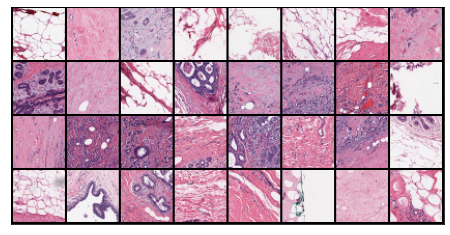

In [7]:
preprocessing.ShowGrid(trainingDataLoader)

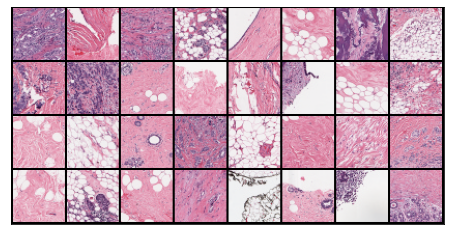

In [8]:
preprocessing.ShowGrid(validationDataLoader)

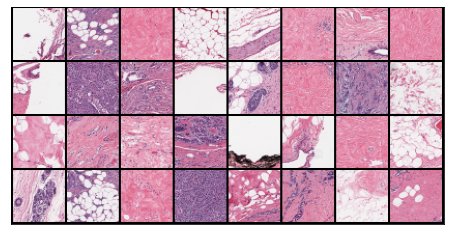

In [9]:
preprocessing.ShowGrid(testingDataLoader)

In [10]:
network = Network()
predictions = Predictions()

def Correct(predictions, labels):
    return predictions.argmax(dim = 1).eq(labels).sum().item()

In [11]:
optimizer = optim.Adam(network.parameters(), lr = 0.01)

totalLoss, totalCorrect = 0, 0

for batch in trainingDataLoader:
    images, labels = batch
    
    predictions = network(images)
    loss = F.cross_entropy(predictions, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    totalLoss += loss.item()
    totalCorrect +=  Correct(predictions, labels)

print("epoch: ", 0, "totalCorrect: ", totalCorrect, "loss: ", totalLoss)

KeyboardInterrupt: 